In [ ]:
! wget http://cb.lk/covid_19

--2020-12-01 06:39:02--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-12-01 06:39:03--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-12-01 06:39:03--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-12-01 06:39:03--  https://www.dropbox.com/s/raw/7

In [ ]:
! unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [ ]:
Train_Path = 'CovidDataset/Train'
Val_Path = 'CovidDataset/Val'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import *
from keras import models
model = models.Sequential()
from keras.preprocessing import image

In [ ]:
from keras.applications import Xception
conv_base = Xception(weights='imagenet',
include_top=False,
input_shape=(224, 224, 3))

83689472/83683744 [==============================] - 4s 0us/step


In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(Dropout(0.25))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2, 
    horizontal_flip = False,
)

In [ ]:
test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory('CovidDataset/Train',
target_size=(224, 224),batch_size=20,class_mode='binary')

Found 224 images belonging to 2 classes.


In [ ]:
validation_generator = test_dataset.flow_from_directory(
'CovidDataset/Val',target_size=(224, 224),
batch_size=20,
class_mode='binary')

Found 60 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
train_generator,
steps_per_epoch=8,
epochs=10,
validation_data=validation_generator,
validation_steps=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
8/8 [==============================] - 119s 15s/step - loss: 1.1203 - acc: 0.7639 - val_loss: 0.1095 - val_acc: 0.9500
Epoch 2/10
8/8 [==============================] - 117s 15s/step - loss: 0.1447 - acc: 0.9653 - val_loss: 0.5980 - val_acc: 0.8000
Epoch 3/10
8/8 [==============================] - 128s 16s/step - loss: 0.0287 - acc: 0.9875 - val_loss: 0.0312 - val_acc: 0.9750
Epoch 4/10
8/8 [==============================] - 119s 15s/step - loss: 0.0576 - acc: 0.9861 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 5/10
8/8 [==============================] - 131s 16s/step - loss: 0.0686 - acc: 0.9875 - val_loss: 0.2832 - val_acc: 0.8500
Epoch 6/10
8/8 [==============================] - 117s 15s/step - loss: 0.0292 - acc: 0.9792 - val_loss: 0.0010 - val_acc: 1.0000
Epoch 7/10
8/8 [==============================] - 115s 14s/step - loss: 0.0027 - acc: 1.0000 - val_loss: 6.7389e-05 - val_acc: 1.0000
Epoch 8/10

In [ ]:
#Displaying curves of loss and accuracy during training

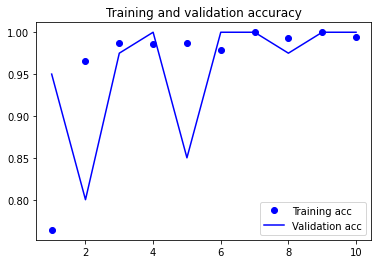

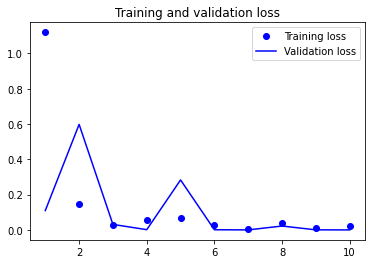

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(train_generator)

12/12 [==============================] - 44s 4s/step - loss: 0.0507 - acc: 0.9866


In [ ]:
model.evaluate(validation_generator)

3/3 [==============================] - 8s 3s/step - loss: 0.0262 - acc: 0.9833


[0.026202745735645294, 0.9833333492279053]